Importing Required Libraries

In [1]:
%matplotlib inline
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#loading the data
df = pd.read_csv('Copy of Insurance_Marketing-Customer-Value-Analysis.csv')
dataset = df
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**DATA PREPROCESSING**

1-Firstly we will handle missing values in the dataset

In [2]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

No missing values are found

Let's carry on with preprocessing

2 - Basic data manipulation

In [3]:
#Renaming the columnns (removing space delimitation)
df = df.rename(columns = {'Customer Lifetime Value':'CLV', 'EmploymentStatus': 'EmploymentStatus', 'Location Code':'LocationCode', 'Marital Status': 'MaritalStatus','Monthly Premium Auto':'MonthlyPremiumAuto', 'Months Since Last Claim':'MonthsSinceLastClaim','Months Since Policy Inception':'MonthsSincePolicyInception','Number of Open Complaints':'NumberOfOpenComplaints','Number of Policies':'NumberofPolicies','Policy Type':'PolicyType','Policy':'PolicySubType','Renew Offer Type':'RenewOfferType','Sales Channel':'SalesChannel','Total Claim Amount':'TotalClaimAmount','Vehicle Class':'VehicleClass','Vehicle Size':'VehicleSize'})
dataset = dataset.rename(columns = {'Customer Lifetime Value':'CLV', 'EmploymentStatus': 'EmploymentStatus', 'Location Code':'LocationCode', 'Marital Status': 'MaritalStatus','Monthly Premium Auto':'MonthlyPremiumAuto', 'Months Since Last Claim':'MonthsSinceLastClaim','Months Since Policy Inception':'MonthsSincePolicyInception','Number of Open Complaints':'NumberOfOpenComplaints','Number of Policies':'NumberofPolicies','Policy Type':'PolicyType','Policy':'PolicySubType','Renew Offer Type':'RenewOfferType','Sales Channel':'SalesChannel','Total Claim Amount':'TotalClaimAmount','Vehicle Class':'VehicleClass','Vehicle Size':'VehicleSize'})

list(df.columns.values)

del df['Customer']
del df['Effective To Date']
del df['VehicleSize']

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLV,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
MonthlyPremiumAuto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
MonthsSinceLastClaim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
MonthsSincePolicyInception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
NumberOfOpenComplaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
NumberofPolicies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
TotalClaimAmount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


3- Anamoly Detection and removal

In [4]:
df.head()

,State,CLV,Response,Coverage,Education,EmploymentStatus,Gender,Income,LocationCode,MaritalStatus,...,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberOfOpenComplaints,NumberofPolicies,PolicyType,PolicySubType,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [5]:
#Now we will treat the outliers , by replacing those values with the median values (using Interuartile Method)
#Calculating Missing Values for CLV variable
first_quantile_CLV = df['CLV'].quantile(0.25)
third_quantile_CLV = df['CLV'].quantile(0.75)
IQR_CLV = third_quantile_CLV - first_quantile_CLV
#Range for Outliers
up_threshold_CLV=third_quantile_CLV+1.5*IQR_CLV
print("Upper Treshold of CLV: ",up_threshold_CLV)

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
print("Upper threshold of income:", up_threshold1)

# Removing anomalous datapoints 
# Where "MonthsSincePolicyInception" < "MonthsSinceLastClaim"  and there is only 1 or no policy
# Where Income is 0 and CLV is greater than upper threshold of CLV

i=0
inception = df['MonthsSincePolicyInception']
last = df['MonthsSinceLastClaim']
number = df ['NumberofPolicies']
for i in range (0,len(inception)):
    if ( ((inception[i]<last[i]) & (number[i]<2)) or ((df['Income'][i]<=0) & (df['CLV'][i]>16414.0)) ):
        df.drop([i], inplace=True)
        
df.head()

Upper Treshold of CLV:  16414.039911750002
Upper threshold of income: 155800.0


,State,CLV,Response,Coverage,Education,EmploymentStatus,Gender,Income,LocationCode,MaritalStatus,...,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberOfOpenComplaints,NumberofPolicies,PolicyType,PolicySubType,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car


4 - Encoding categorical variables based on their correlation with CLV values

In [6]:
def corr_with_clv(col_name):
    dic={}
    no_cat,cat=(df[col_name].nunique(),df[col_name].unique())
    value_count=dict(df[col_name].value_counts())
    print(f'value counts = {value_count}')
    print("Correlation with CLV value")
    for i in range(no_cat):
        dic[cat[i]]=df.loc[df[col_name] == cat[i], 'CLV'].sum()/value_count[cat[i]]

    return dic
  
  
for col in df.columns:
  if df[col].dtype == 'object':
    print("Feature : ",col)   
    print(corr_with_clv(col))
    print()
    print()


Feature :  State
value counts = {'California': 2921, 'Oregon': 2393, 'Arizona': 1572, 'Nevada': 794, 'Washington': 732}
Correlation with CLV value
{'Arizona': 7794.210284903309, 'Nevada': 8071.1020027644845, 'California': 7820.598872972612, 'Washington': 7692.521876677596, 'Oregon': 8027.041039030923}


Feature :  Response
value counts = {'No': 7200, 'Yes': 1212}
Correlation with CLV value
{'No': 7890.672056017361, 'Yes': 7864.4548538118825}


Feature :  Coverage
value counts = {'Basic': 5140, 'Extended': 2516, 'Premium': 756}
Correlation with CLV value
{'Extended': 8672.351962149842, 'Premium': 10736.393177034393, 'Basic': 7083.308814696109}


Feature :  Education
value counts = {'Bachelor': 2536, 'College': 2442, 'High School or Below': 2415, 'Master': 689, 'Doctor': 330}
Correlation with CLV value
{'Bachelor': 7796.397207557176, 'College': 7717.1522294197375, 'Master': 8337.609240422353, 'High School or Below': 8082.7635034380955, 'Doctor': 7464.0072608575765}


Feature :  Employmen

For those features where score is nearly same for all classes we used one hot encoding while for those features where class scores are unbalanced we mapped the code codes manually

In [7]:
one_hot = pd.get_dummies(df['EmploymentStatus'])
df = df.join(one_hot)
del df['EmploymentStatus']

df.replace({'PolicySubType':{'Personal L3': 1, 'Corporate L2': 0, 'Personal L1': 1, 'Corporate L3': 0, 'Special L2': 2, 'Corporate L1': 2, 'Personal L2': 2, 'Special L1': 2, 'Special L3': 2}}, inplace=True)

one_hot = pd.get_dummies(df['MaritalStatus'])
df = df.join(one_hot)
del df['MaritalStatus']

one_hot = pd.get_dummies(df['LocationCode'])
df = df.join(one_hot)
del df['LocationCode']

one_hot = pd.get_dummies(df['Education'])
df = df.join(one_hot)
del df['Education']

one_hot = pd.get_dummies(df['SalesChannel'])
df = df.join(one_hot)
del df['SalesChannel']

df.replace({'RenewOfferType':{'Offer1':3 , 'Offer2':2 , 'Offer3':1 , 'Offer4':0}}, inplace=True)
df.replace({'Coverage':{'Basic':0 , 'Extended':1 , 'Premium':2 }}, inplace=True)
df.replace({'PolicyType':{'Personal Auto':0 , 'Corporate Auto':1 , 'Special Auto':2 }}, inplace=True)
encode = {"VehicleClass": {"Four-Door Car":0, "Two-Door Car":1,"SUV":2,"Sports Car":3,"Luxury SUV":5,"Luxury Car":4}}
df.replace(encode, inplace=True)

df.replace({'Gender':{'M':1 , 'F':0}}, inplace=True)

df.replace({'Response':{'Yes':1 , 'No':0}}, inplace=True)

one_hot = pd.get_dummies(df['State'])
df = df.join(one_hot)
del df['State']

In [8]:
df.head()

,CLV,Response,Coverage,Gender,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberOfOpenComplaints,NumberofPolicies,...,Master,Agent,Branch,Call Center,Web,Arizona,California,Nevada,Oregon,Washington
1,6979.535903,0,1,0,0,94,13,42,0,8,...,0,1,0,0,0,1,0,0,0,0
2,12887.431650,0,2,0,48767,108,18,38,0,2,...,0,1,0,0,0,0,0,1,0,0
3,7645.861827,0,0,1,0,106,18,65,0,7,...,0,0,0,1,0,0,1,0,0,0
4,2813.692575,0,0,1,43836,73,12,44,0,1,...,0,1,0,0,0,0,0,0,0,1
5,8256.297800,1,0,0,62902,69,14,94,0,2,...,0,0,0,0,1,0,0,0,1,0


5- Removing outlier using Interquantile range

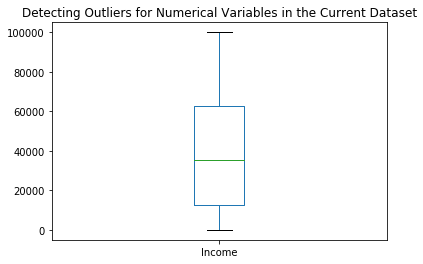

In [9]:
plot1 = df[['Income']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
up_threshold1
down_threshold1=first_quantile1-1.5*IQR1
down_threshold1
#Treatment
median1 = float(df['Income'].median())
median1
df["Income"] = np.where(df["Income"] >up_threshold1, median1,df['Income'])



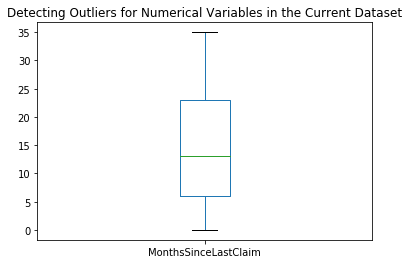

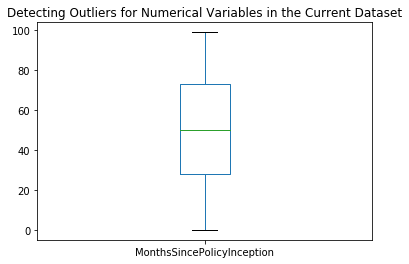

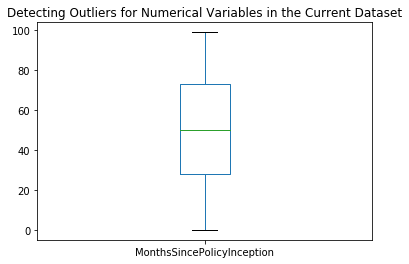

In [10]:
plot1 = df[['MonthsSinceLastClaim']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for No of Policies variable
first_quantile4 = df['NumberofPolicies'].quantile(0.25)
third_quantile4 = df['NumberofPolicies'].quantile(0.75)
IQR4 = third_quantile4 - first_quantile4
#Range for Outliers
up_threshold4=third_quantile4+1.5*IQR4
up_threshold4
down_threshold4=first_quantile4-1.5*IQR4
down_threshold4
#Treatment
median4 = float(df['NumberofPolicies'].median())
median4
df["NumberofPolicies"] = np.where(df["NumberofPolicies"] >up_threshold4, median4,df['NumberofPolicies'])



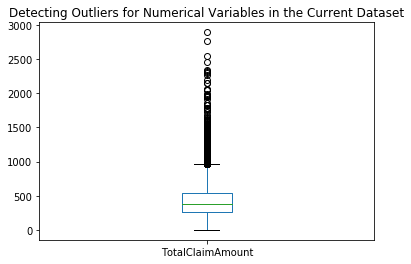

In [11]:
plot1 = df[['TotalClaimAmount']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Total Claim Amount variable
first_quantile3 = df['TotalClaimAmount'].quantile(0.25)
third_quantile3 = df['TotalClaimAmount'].quantile(0.75)
IQR3 = third_quantile3 - first_quantile3
#Range for Outliers
up_threshold3=third_quantile3+1.5*IQR3
up_threshold3
down_threshold3=first_quantile3-1.5*IQR3
down_threshold3
#Treatment
median3 = float(df['TotalClaimAmount'].median())
median3
df["TotalClaimAmount"] = np.where(df["TotalClaimAmount"] >up_threshold3, median3,df['TotalClaimAmount'])



In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLV,8412.0,7886.894685,6433.578930,1898.007675,4242.428750,5930.016709,8901.943166,83325.381190
Response,8412.0,0.144080,0.351192,0.000000,0.000000,0.000000,0.000000,1.000000
Coverage,8412.0,0.478840,0.655245,0.000000,0.000000,0.000000,1.000000,2.000000
Gender,8412.0,0.488588,0.499899,0.000000,0.000000,0.000000,1.000000,1.000000
Income,8412.0,38548.397646,30194.964773,0.000000,12611.750000,35138.000000,62811.250000,99981.000000
MonthlyPremiumAuto,8412.0,92.832263,33.993209,61.000000,68.000000,83.000000,109.000000,298.000000
MonthsSinceLastClaim,8412.0,14.640632,9.991357,0.000000,6.000000,13.000000,23.000000,35.000000
MonthsSincePolicyInception,8412.0,50.371969,27.057514,0.000000,28.000000,50.000000,73.000000,99.000000
NumberOfOpenComplaints,8412.0,0.389206,0.921464,0.000000,0.000000,0.000000,0.000000,5.000000
NumberofPolicies,8412.0,2.763195,2.035539,1.000000,1.000000,2.000000,3.000000,8.000000


Checking for Skewness and Kurtosis

In [13]:
df.skew()

CLV                           3.131516
Response                      2.027410
Coverage                      1.036836
Gender                        0.045669
Income                        0.259808
MonthlyPremiumAuto            2.138946
MonthsSinceLastClaim          0.333313
MonthsSincePolicyInception   -0.029014
NumberOfOpenComplaints        2.772523
NumberofPolicies              1.266963
PolicyType                    1.646512
PolicySubType                -0.181316
RenewOfferType               -0.733741
TotalClaimAmount              0.349880
VehicleClass                  1.340102
Disabled                      4.334900
Employed                     -0.578776
Medical Leave                 4.228310
Retired                       5.444893
Unemployed                    1.241532
Divorced                      1.942327
Married                      -0.344577
Single                        1.074286
Rural                         1.507158
Suburban                     -0.504205
Urban                    

In [32]:
df.kurtosis()

CLV                           15.062111
Response                       2.110895
Coverage                      -0.094295
Gender                        -1.998390
Income                        -1.082890
MonthlyPremiumAuto             6.329220
MonthsSinceLastClaim          -1.024296
MonthsSincePolicyInception    -1.069103
NumberOfOpenComplaints         7.646591
NumberofPolicies               0.513690
PolicyType                     1.780399
PolicySubType                 -0.877255
RenewOfferType                -0.601834
TotalClaimAmount              -0.078564
VehicleClass                   1.544670
Disabled                      16.795353
Employed                      -1.665415
Medical Leave                 15.882384
Retired                       27.653439
Unemployed                    -0.458707
Divorced                       1.773055
Married                       -1.881714
Single                        -0.846111
Rural                          0.271591
Suburban                      -1.746193


6- Scaling the features

In [14]:
#Now we will do Feature Scaling (using standard scalar)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df.iloc[:, 4:8 ] = min_max_scaler.fit_transform(df.iloc[:, 4:8])
df.iloc[:, 13:14 ] = min_max_scaler.fit_transform(df.iloc[:, 13:14])
df.head()

,CLV,Response,Coverage,Gender,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberOfOpenComplaints,NumberofPolicies,...,Master,Agent,Branch,Call Center,Web,Arizona,California,Nevada,Oregon,Washington
1,6979.535903,0,1,0,0.000000,0.139241,0.371429,0.424242,0,8.0,...,0,1,0,0,0,1,0,0,0,0
2,12887.431650,0,2,0,0.487763,0.198312,0.514286,0.383838,0,2.0,...,0,1,0,0,0,0,0,1,0,0
3,7645.861827,0,0,1,0.000000,0.189873,0.514286,0.656566,0,7.0,...,0,0,0,1,0,0,1,0,0,0
4,2813.692575,0,0,1,0.438443,0.050633,0.342857,0.444444,0,1.0,...,0,1,0,0,0,0,0,0,0,1
5,8256.297800,1,0,0,0.629140,0.033755,0.400000,0.949495,0,2.0,...,0,0,0,0,1,0,0,0,1,0


**Data Visualisation**

Now we will interpret the data using various plots  

<Figure size 864x576 with 0 Axes>

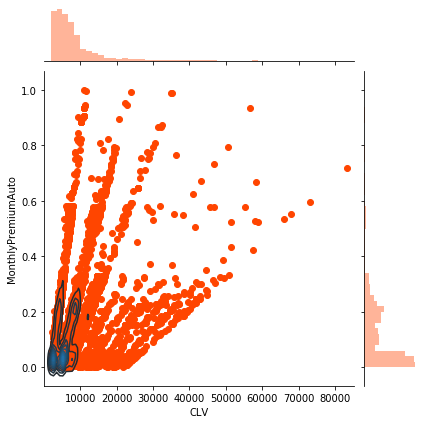

In [15]:
# Draw a scatterplot, then add a joint density estimate
plt.figure(figsize=(12,8))
ax = sns.jointplot(x="CLV", y="MonthlyPremiumAuto", data=df[['CLV','MonthlyPremiumAuto']],color='orangered')
ax.plot_joint(sns.kdeplot, zorder=1, n_levels=10)

From the density plot we infer data is heteroscedastic

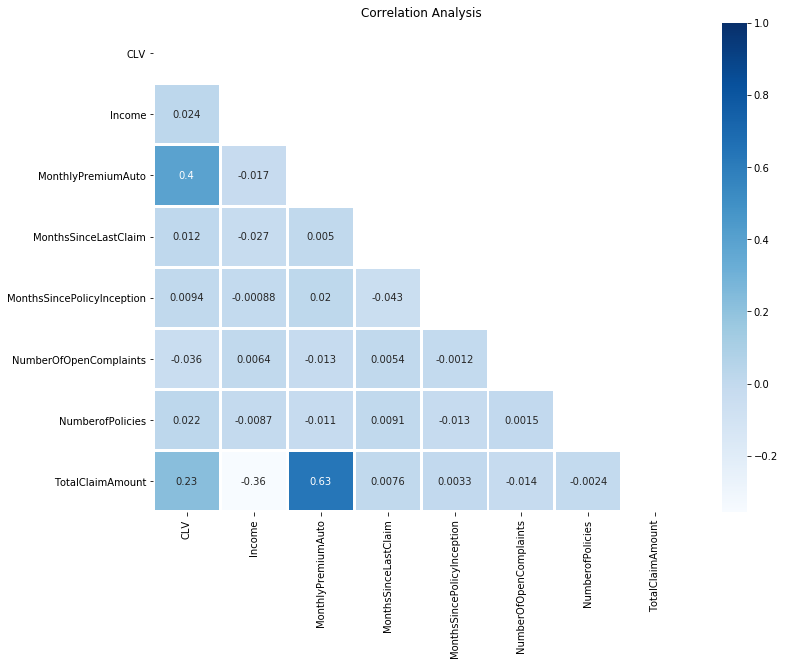

In [16]:
#Finding CORRELATION amongst Variables
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
dataset.corr(method = 'pearson')
plt.figure(figsize=(12,9))
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Analysis')
sns.heatmap(dataset.corr(), cmap='Blues', mask = mask, linewidths=2, annot=True)

No Strong correlation is found so autocorrelation and multicollinearty doesn't exists in dataset

Text(0.5, 1.0, 'CLV vs Total Claim')

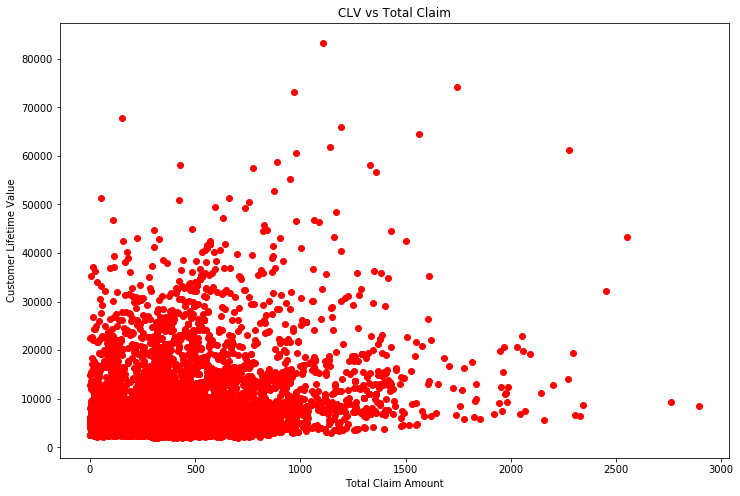

In [17]:
#Analyzing the relationship between CLV and Total Amount Claimed
plt.figure(figsize=(12,8))
plt.scatter(dataset['TotalClaimAmount'], dataset['CLV'], color='red')
plt.xlabel('Total Claim Amount')
plt.ylabel('Customer Lifetime Value')
plt.title('CLV vs Total Claim')

Quite clearly, we can interprete that people who frequently make claims (and therefore have HIGHER TOTAL CLAIM AMOUNT)
have LOWER CLV values , ie. they are NON-PROFITABLE customers

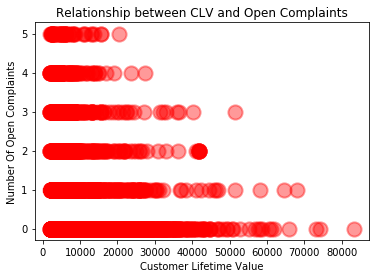

In [18]:
#Scatter plot analyzing CLV and Number of Open Complaints 

plt.scatter(dataset['CLV'], dataset['NumberOfOpenComplaints'], s=200, color='red', cmap="Greens", alpha=0.4, linewidth=2)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Number Of Open Complaints")
plt.title("Relationship between CLV and Open Complaints")
plt.rcParams["figure.figsize"] = (6, 4)

Quite clearly, number of open complaints negatively correlate with the customer lifetime value. 
Customer with MORE NUMBER OF COMPLAINTS is definitely DISSATISFIED and hence likely to be LESS BENEFICIAL for company profits.

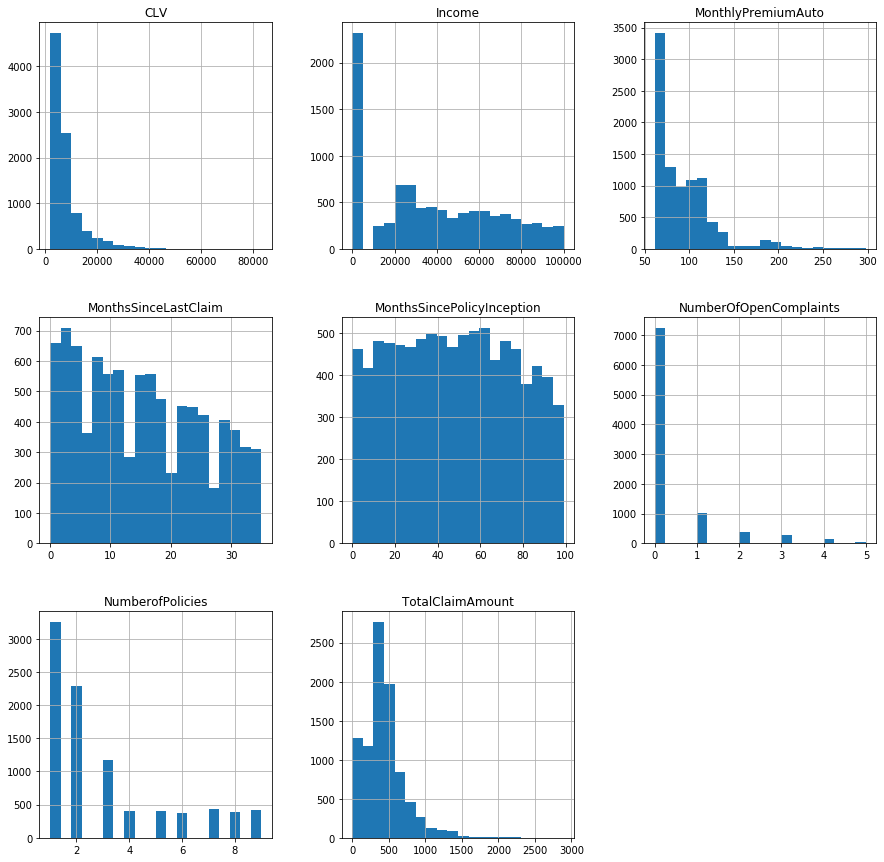

In [19]:
column_index = ['CLV','Income','MonthlyPremiumAuto','MonthsSinceLastClaim','MonthsSincePolicyInception','NumberOfOpenComplaints','NumberofPolicies','TotalClaimAmount']
histogram1 = dataset[column_index].hist(bins=20 , figsize = (15,15))

In [20]:
# Generate an aggregated DataFrame to represent the customer population by state
Customer_count_State = dataset[['State','Response']].groupby('State').count()

# Recode the index
Customer_count_State.index = ['Arizona','California','Nevada','Oregon','Washington']

# Show the aggregated DataFrame
Customer_count_State

,Response
Arizona,1703
California,3150
Nevada,882
Oregon,2601
Washington,798


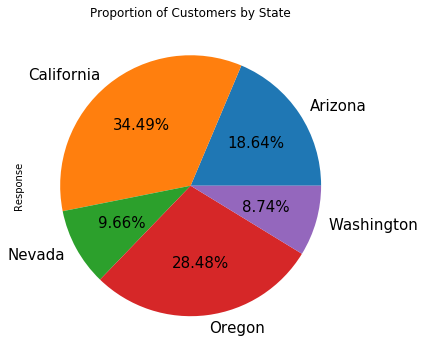

In [21]:
# Pie plot displaying the customer distribution across states
Customer_count_State['Response'].plot(kind='pie',autopct='%.2f%%',fontsize=15,figsize=(6,6))
plt.title('Proportion of Customers by State')
plt.show()

Text(0.5, 1.0, 'Impact of Sales Channel on CLV')

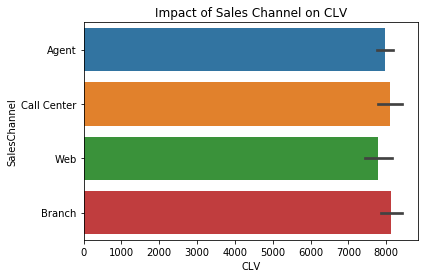

In [22]:
# Analyzing the Relationship between Sales Channel and Average CLV 
ax = sns.barplot(x="CLV", y="SalesChannel", data=dataset)
plt. title('Impact of Sales Channel on CLV')

Peope using CALL CENTER and BRANCH for automobile insurance policies have GREATER CLV compared to those who enrolled for insurance policies through other channels

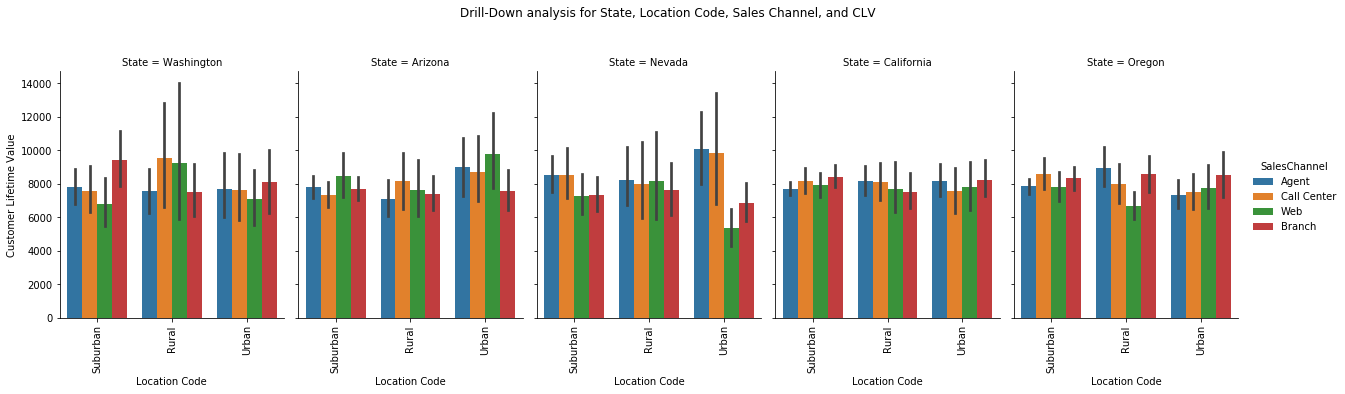

<Figure size 1440x1152 with 0 Axes>

In [23]:
# Further analysis of Sales Channel vs Average CLV for states based on location code
g = sns.factorplot(x="LocationCode", y="CLV",
                   hue="SalesChannel", col="State",
                   data=dataset, kind="bar", palette="tab10",
                   size=5, aspect=.7);
g.set_xticklabels(rotation=90)
g.set_xlabels("Location Code")
g.set_ylabels("Customer Lifetime Value")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Drill-Down analysis for State, Location Code, Sales Channel, and CLV')
plt.figure(figsize=(20,16))
plt.show()

Text(0.5, 1.0, 'Coverage vs Monthly Premium')

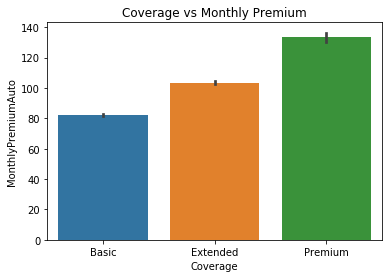

In [24]:
# Coverage type vs Average CLV
ax = sns.barplot(x="Coverage", y="MonthlyPremiumAuto", data=dataset)
plt. title('Coverage vs Monthly Premium')

Text(0.5, 1.0, 'Coverage vs CLV')

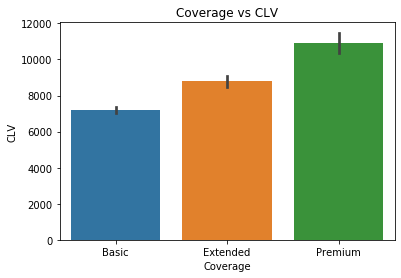

In [25]:
# Coverage type vs Average CLV
ax = sns.barplot(x="Coverage", y="CLV", data=dataset)
plt. title('Coverage vs CLV')

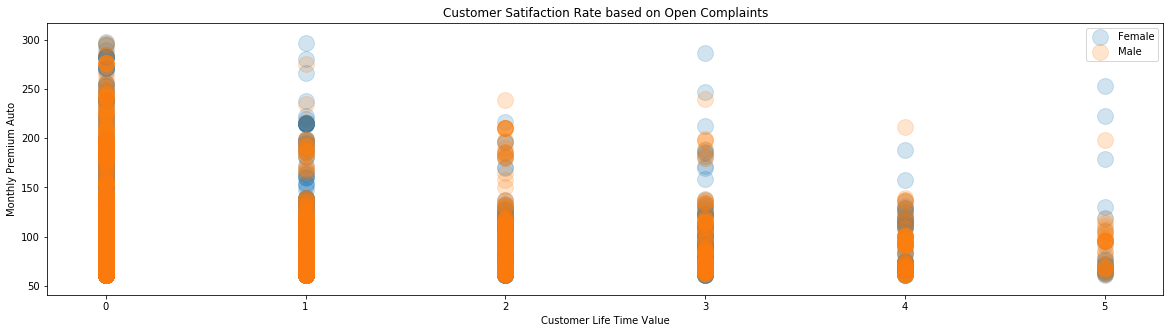

In [26]:
grouped = dataset.groupby('Gender')
fig, ax = plt.subplots(figsize=(20,5))
for name, group in grouped:
    ax.scatter(group.NumberOfOpenComplaints, group.MonthlyPremiumAuto, alpha = 0.2, s = 250)
ax.legend(['Female', 'Male'])
plt.xlabel('Customer Life Time Value')
plt.ylabel('Monthly Premium Auto')
plt.title('Customer Satifaction Rate based on Open Complaints')
plt.show()

The range of CLV payment OF MALES is a bit HIGHER
we can see that the nuber of complaints decrese for male customers from 0 to 5
Instead, an increase can be observed for female customers
WOMEN COMPLAIN MORE THAN MEN
Previously, we had observed that number of COMPLAINTS is NEGATIVELY CORRELATED with CLV

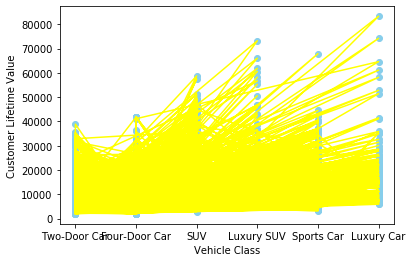

In [27]:
plt.scatter(dataset['VehicleClass'],dataset['CLV'],color='skyblue')
plt.plot(dataset['VehicleClass'],dataset['CLV'],color='yellow')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

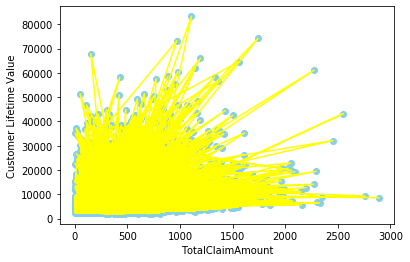

In [28]:
plt.scatter(dataset['TotalClaimAmount'],dataset['CLV'],color='skyblue')
plt.plot(dataset['TotalClaimAmount'],dataset['CLV'],color='yellow')
plt.xlabel('TotalClaimAmount')
plt.ylabel('Customer Lifetime Value')
plt.show()

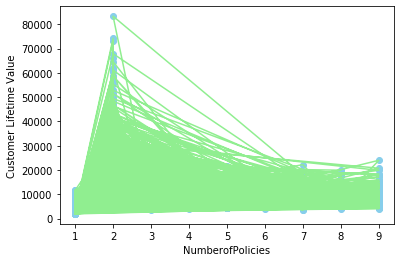

In [29]:
plt.scatter(dataset['NumberofPolicies'],dataset['CLV'],color='skyblue')
plt.plot(dataset['NumberofPolicies'],dataset['CLV'],color='lightgreen')
plt.xlabel('NumberofPolicies')
plt.ylabel('Customer Lifetime Value')
plt.show()

**Feature Engineering and Feature Selection**

Feature engineering is an essential part of building any intelligent system. Feature engineering is the process of transforming data into features to act as inputs for machine learning models such that good quality features help in improving the overall model performance.

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [31]:
df.columns

Index(['CLV', 'Response', 'Coverage', 'Gender', 'Income', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberOfOpenComplaints', 'NumberofPolicies', 'PolicyType',
       'PolicySubType', 'RenewOfferType', 'TotalClaimAmount', 'VehicleClass',
       'Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed',
       'Divorced', 'Married', 'Single', 'Rural', 'Suburban', 'Urban',
       'Bachelor', 'College', 'Doctor', 'High School or Below', 'Master',
       'Agent', 'Branch', 'Call Center', 'Web', 'Arizona', 'California',
       'Nevada', 'Oregon', 'Washington'],
      dtype='object')

In [32]:
df['Profit'] = df['MonthlyPremiumAuto']*df['MonthsSincePolicyInception'] - df['TotalClaimAmount']
df['Income_monthly_auto']=df['Income']*df['MonthlyPremiumAuto']
df['monthly_with_Number_of_policies']=df['MonthlyPremiumAuto']*df['NumberofPolicies']


**Splitting the dataset**

In [33]:
X=df.drop("CLV",axis=1)
Y=df["CLV"]

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [35]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [36]:
alg=RandomForestRegressor()
alg.fit(X_train,Y_train)
y_pred=alg.predict(X_test)
r2=metrics.r2_score(Y_test, y_pred)
n=Y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)
print("R squared:",metrics.r2_score(Y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(Y_test,y_pred))

Adjusted r squared:  0.6535251908432076
R squared: 0.6453142581266604
MAPE: 11.26992388980041


In [38]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,Y_train)


y_pred_1 = xg_reg.predict(X_test)
r2=metrics.r2_score(Y_test, y_pred_1)
n=Y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)
print("R squared:",metrics.r2_score(Y_test,y_pred_1))
print("MAPE:",mean_absolute_percentage_error(Y_test,y_pred_1)) 

Adjusted r squared:  0.25737607754815517
R squared: 0.25414238788292576
MAPE: 24.23516906660269
